# **Credit Card Fraud Detection Model**

<img src="https://media-exp1.licdn.com/dms/image/C4E12AQHmadd2k2fedQ/article-cover_image-shrink_600_2000/0/1646588916879?e=2147483647&v=beta&t=52NR3z513BlkDYCF2kSVLRibKtyekHBTCz8ujU4fIf4"  width="1000" height="400" />

# **Table of Content**
* [Introduction](#Introduction)
* [Importing Packages](#Importing-the-neccesary-packages)
* [Importing Data](#Data-importation)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Finding Null Values](#Checking-for-missing-values)
    - [Data Summary](#Summary-of-data)
    - [Removing Duplicates](#Checking-for-duplicates)
    - [Picking Sample](#Sampling-Data)
    - [Distribution of Sample Data](#Distribution-of-Class-from-Sample-data-against-Original-data)
    - [Unique Count of Class](#Checking-Unique-Values-of-Class)
    - [Distribution of Amount](#Amount-distribution)
    - [Distribution of Time](#Time-distribution)
    - [Distribution of Amount and Time](#Relationship-Between-Time-and-Amount)
    - [Correlation](#Correlation)
* [Data preprocessing](#Data-preprocessing-for-modelling)
    * [Data Slicing into X and y ](#Define-predictors-and-target-values)
    * [Data splitting](#Splitting-the-data-into-train_set-and-test_set)
    * [Checking for balance](#Checking-whether-the-target-variable-is-balanced-or-not)
    * [Correcting Imbalance](#Correcting-imbalance-data)
* [Building Models](#Building-of-Model)
    * [Base Model Random Forest](#Base-Model---Random-Forest-Classifier)
    * [Logistic Regression](#Logistic-Regression)
    * [AdaBoost](#AdaBoost-Classifier)
    * [Gradient Boost](#Gradient-Boost-Classifier)
    * [Voting Classifier](#Voting-Classifier)
    * [XGBoost](#XGBoost-Classifier)
    * [CatBoost](#Cat-Boost-Classifier)
* [Model Selection](#Model-Selection)
    * [Performance Measures](#Creating-a-DataFrame-with-Performance-measures)
    * [ROC Curve](#ROC-Curve)
    * [Best Model](#Best-Model)
    * [Feature Importance](#Feature-Importance)
* [Implementing-the Best model](#Implementing-the-Best-Model-with-test-data)
* [Conclusion](#Conclusion)


# **Introduction**

**Project Overview**
Credit card fraud involves the illegal use of someone else's credentials to make fraudulent credit card transactions so that the individual is charged for items that they did not purchase. The person whose credit card is mishandled usually ends up with unpaid debt. He/she may be unable to obtain new credit due to a poor credit score (at least until matters are sorted out), which makes early detection of fraudulent transactions by credit card companies crucial.

**Project Objectives**
This project is to build a **Machine Learning Model** to assist banks and/or credit union to predict if a transaction is fraudulent or legitimate.

# **Importing the neccesary packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Plotly
import plotly.express as px 
import plotly.graph_objects as go

import sklearn

#date library
import datetime

import warnings
warnings.filterwarnings('ignore')

import sys
np.set_printoptions(threshold=sys.maxsize)

In [2]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


## **Importing models,validation and metrics**

In [3]:
#model selection libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#ensemble libraries
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

#XGBoost
from xgboost import XGBClassifier

#Catboost
from catboost import CatBoostClassifier


#preprocessing libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


#metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

#imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline
from collections import Counter

# **Data-importation**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#creating a path for our dataset
path = "/content/drive/MyDrive/Colab Notebooks/Fraud detection/creditcard.csv" 

In [6]:
# Customising default values to view all columns
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [7]:
#loading the data and checking the head
data = pd.read_csv(path)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Due to confidentiality issue, original features V1, V2,... V28 have been transformed with PCA.

The only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.

Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [8]:
#checking the number of rows and columns
data.shape
print("The dataset has {} rows and {} columns.".format(data.shape[0],data.shape[1]))

The dataset has 284807 rows and 31 columns.


# **Exploratory Data Analysis**

We must investigate, clean, and filter the data after it has been read into Python before processing it for machine learning. 

Now that we have the data, I wanted to perform some preliminary comparisons between the Time, Amount, and Class columns.

## Checking for missing values

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Observation**

There were no missing values in our data

## Summary of data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Checking for duplicates

In [ ]:
data[data.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,0.005356,-0.541998,0.745036,-0.375165,-0.068227,-0.795939,-0.497901,-0.134224,-1.004958,0.086074,-0.207620,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,-0.828015,-1.192581,0.944989,1.372532,-0.036493,-0.208747,0.320086,-0.204910,-0.024821,-0.468859,0.031950,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,-0.830603,-1.191774,0.942870,1.372621,-0.037988,-0.208490,0.321883,-0.205951,-0.025225,-0.468427,0.023667,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,-1.449823,-0.508930,0.600035,-0.627313,1.017499,-0.887384,0.420096,1.856497,1.315099,1.096112,-0.821707,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [ ]:
data.duplicated().sum()
print("The dataset contains {}, and we need to drop it".format(data.duplicated().sum()))

The dataset contains 1081, and we need to drop it


In [9]:
#dropping duplicated rows
data.drop_duplicates(inplace=True)
print("The dataset after removing duplicates now has {} rows and {} columns".format(data.shape[0],data.shape[1]))

The dataset after removing duplicates now has 283726 rows and 31 columns


[Back to the Top](#Introduction)

## **Sampling Data**
We have a very large dataset hence the need to sample fraction of the dataset to aid in efficiency of running the codes.

In [10]:
#Sampling 10% of our the data randomly 
sample_df = data.sample(frac= 0.10, random_state = 42)
sample_df.shape
print("The sampled data has {} rows and {} columns. Random State was set to help reproductivity.".format(sample_df.shape[0],sample_df.shape[1]))

The sampled data has 28373 rows and 31 columns. Random State was set to help reproductivity.


## **Distribution of Class from Sample data against Original data**

In [ ]:
#checking the distribution of the class from the sample data against the actual data
print(sample_df["Class"].value_counts())
print('\n')
print(sample_df["Class"].value_counts(normalize=True)) #normlize returns the relative frequencies of the class

0    28331
1       42
Name: Class, dtype: int64


0    0.99852
1    0.00148
Name: Class, dtype: float64


In [ ]:
print(data["Class"].value_counts())
print('\n')
print(data["Class"].value_counts(normalize=True))

0    283253
1       473
Name: Class, dtype: int64


0    0.998333
1    0.001667
Name: Class, dtype: float64


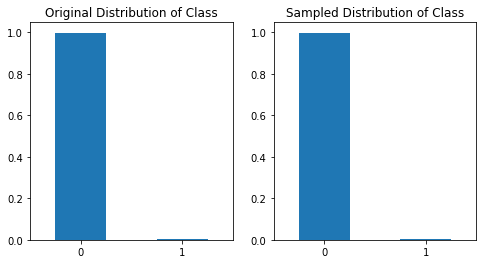

In [ ]:
#visulizing both cases
plt.figure(figsize=(8,4))
#original Data
plt.subplot(1,2,1)
data["Class"].value_counts(normalize=True).plot(kind='bar',rot=0)
plt.title("Original Distribution of Class")

#sampled Data
plt.subplot(1,2,2)
sample_df["Class"].value_counts(normalize=True).plot(kind='bar',rot=0)
plt.title("Sampled Distribution of Class")

plt.show()

This dataset has 473 frauds out of 283,726 transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.167% of all transactions.The sampled dataset on the other hand, had 25 frauds out of 14,161 transactions. 

Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis, our algorithms will probably overfit since it will "assume" that most transactions are not a fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

In [ ]:
#saving sampled data for future use. 
#sample_df.to_csv("Sample_data.csv",index=False)


## **Checking Unique Values of Class**

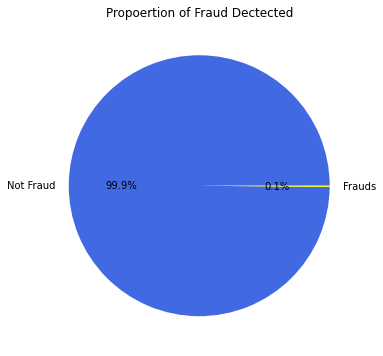

In [ ]:
plt.figure(figsize=(10,6))
labels=['Not Fraud' , 'Frauds']
explode = [0,0]
color=['royalblue' , 'yellow']
sizes=sample_df.Class.value_counts().values

plt.pie(sizes,explode,labels,autopct="%1.1f%%", colors = color)
plt.title('Propoertion of Fraud Dectected')
plt.show()

**Observation**

It is observed that 99.9% of the transaction  is legitimate (No Fraud) and 0.1% transactions is fraudulent. There is still the need to reduce the amount of fraudulent activity desipte the fact that it is less than 1%. 

[Back to the Top](#Introduction)

## **Amount distribution**

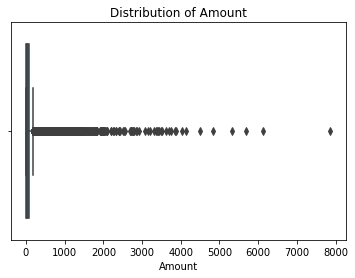

In [ ]:
#Using boxplot to check the distribution of the amount coulmn(Overall Dataset). 
sns.boxplot(x=sample_df["Amount"])
plt.title('Distribution of Amount')
plt.show()

**Observation**

Most the transaction amount falls between 0 and about 3000 and we have some outliers for really big amount transactions. It is observed that the data contains outliers. The highest amount is over 7000. 

**Distribution of Amount for Fradulent & Legitimate transactions**

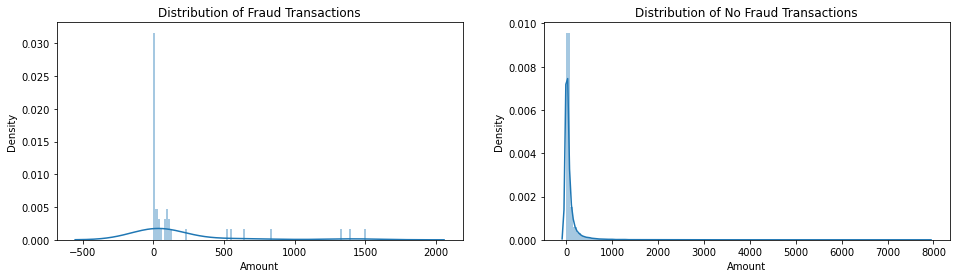

In [ ]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(sample_df[sample_df['Class'] == 1]['Amount'], bins=100, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(sample_df[sample_df['Class'] == 0]['Amount'], bins=100, ax=axs[1])
axs[1].set_title("Distribution of No Fraud Transactions")

plt.show()

**Observation**

This graph shows that most of the fraud transaction amount is less than 500 dollars.

In [ ]:
print("Maximum amount of fraud transaction - ",sample_df[(sample_df['Class'] == 1)]['Amount'].max())
print("Minimum amount of fraud transaction - ",sample_df[(sample_df['Class'] == 1)]['Amount'].min())
print('\n')
print("Maximum amount of no fraud transaction - ",sample_df[(sample_df['Class'] == 0)]['Amount'].max())
print("Minimum amount of no fraud transaction - ",sample_df[(sample_df['Class'] == 0)]['Amount'].min())

Maximum amount of fraud transaction -  1504.93
Minimum amount of fraud transaction -  0.0


Maximum amount of no fraud transaction -  7862.39
Minimum amount of no fraud transaction -  0.0


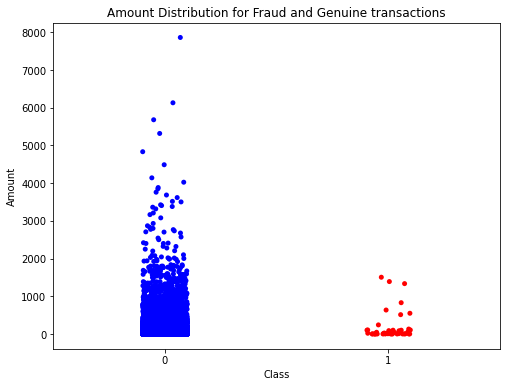

In [ ]:
plt.figure(figsize=(8,6))
sns.stripplot(x='Class', y='Amount',data = sample_df,palette= ["#0000FF","#FF0000"])
plt.title('Amount Distribution for Fraud and Genuine transactions')
plt.show()

Most the transaction amount falls between 0 and about 8000 and we have some outliers for really big amount transactions and it may actually make sense to drop those outliers in our analysis if they are just a few points that are very extreme. Also, we should be conscious about that these outliers should not be the fraudulent transaction.

## **Time distribution**

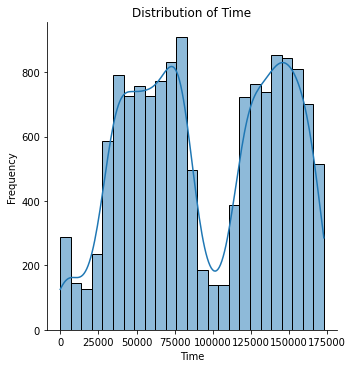

In [ ]:
#Using boxplot to check the distribution of the amount coulmn. 
sns.displot(data=sample_df, x="Time", kde=True)
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

**Observation**

By seeing the graph, we can see there are two peaks in the graph and even there are some local peaks. We can think of these as the time of the day like the peak is the day time when most people do the transactions and the depth is the night time when most people just sleeps.

## **Relationship Between Time and Amount**

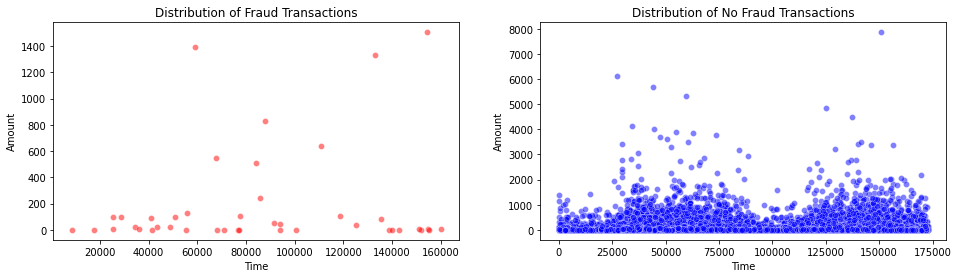

In [ ]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.scatterplot(x='Time',y='Amount', data=sample_df[sample_df['Class']==1], ax=axs[0],color="#FF0000",alpha = 0.5)
axs[0].set_title("Distribution of Fraud Transactions")

sns.scatterplot(x='Time',y='Amount', data=sample_df[sample_df['Class']==0], ax=axs[1],color="#0000FF",alpha = 0.5)
axs[1].set_title("Distribution of No Fraud Transactions")

plt.show()

**Observation**

It is observed that there is a wide varation between the different points in the fraud dataset. However, the no fraud dataset have little varation between the data points, except points with amount greater than 2500. 

## **Correlation**

Keeping two highly related features is like to lead to overfitting. However, this does not mean that you must remove one of the highly correlated features

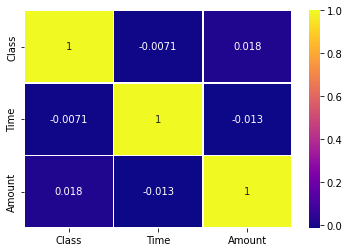

In [ ]:
sns.heatmap(sample_df[["Class","Time","Amount"]].corr(),annot=True,linewidths=0.5,cmap="plasma")

* [Back to the Top](#Introduction)
* [Go to the Bottom](#Conclusion)

# **Data-preprocessing-for-modelling**

### **Define predictors and target values**

In [11]:
#predictor
X = sample_df.drop("Class", axis=1)

#target variable
y = sample_df["Class"]

In [ ]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
104697,69195.0,1.054379,-0.764756,0.160168,0.665587,1.113466,4.771656,-1.536609,1.306483,1.565054,-0.349941,-1.238496,0.608002,-0.249115,-0.933969,-1.407873,-0.191383,-0.180853,0.226980,0.537470,0.050995,-0.097138,-0.029759,-0.171596,1.047201,0.698595,-0.217939,0.101970,0.040152,56.42
134356,80769.0,-4.805134,4.351191,-0.916135,-0.900752,-0.870777,-0.782946,0.328104,0.582501,2.749336,4.728060,0.455162,0.649740,0.930379,-1.663325,1.334738,-0.283321,0.152340,-0.950771,-0.935567,2.160193,-0.854486,-0.758266,0.147005,-0.021274,0.552660,0.008318,0.431835,-0.436239,9.82
42637,41182.0,-1.549833,-0.261143,1.556289,-2.037817,-0.366315,-1.334314,0.165406,-0.025782,-1.472751,-0.172838,-0.594842,0.063059,1.054185,-0.171535,0.192041,-0.867483,-0.348274,0.743352,-1.454672,-0.347365,-0.405656,-0.951005,-0.147752,0.424100,0.081845,1.103559,-0.502271,-0.248822,46.08
882,666.0,0.216344,0.663182,1.303520,0.169219,-0.404266,-0.517288,-0.036938,-0.838221,-0.528675,-0.174777,1.648466,1.114947,0.202150,0.479424,0.226420,0.456003,-0.558258,-0.101939,0.000758,-0.184929,0.552788,-0.961206,-0.014642,0.525962,0.750877,0.141543,0.045107,0.127321,3.58
263275,160870.0,-0.273365,0.825649,0.555674,0.384915,1.343842,1.984159,0.321808,0.510275,-0.891463,-0.115561,0.952916,-0.221254,-0.867646,0.974855,2.441035,-1.711023,0.902400,0.022272,2.097232,0.172188,0.346482,1.162889,-0.557535,-0.896146,0.503553,0.555129,0.129099,0.047571,2.84


In [ ]:
y.head()

104697    0
134356    0
42637     0
882       0
263275    0
Name: Class, dtype: int64

### **Splitting the data into train_set and test_set**

In [12]:
#split 70 - 30. 70 for training and 30 for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state=1415)

### **Checking whether the target variable is balanced or not**

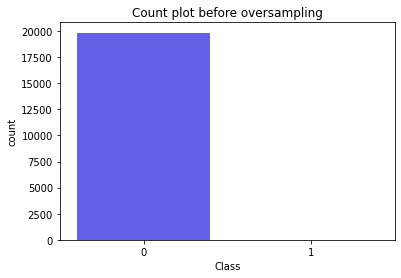

In [ ]:
sns.countplot(y_train,palette= ["#0000FF","#FF0000"],alpha=0.7)
plt.title('Count plot before oversampling')
plt.show()

**Observation**

The graph above shows that the class target variable is highly imbalanced. Building a model with imbalanced data can lead to bias towards the class target variable with higher variables.

When dealing with imbalance data, accuracy is not necessarily the appropriate metric. Therefore, accuracy would not be a useful criterion for evaluating the effectiveness of models developed using this data.

In this situation, alternative metrics must be used, or the data must be balanced statistically. It is highly recommended to balance the data to avoid bias.

In [ ]:
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (19861, 30)
y_train -  (19861,)
X_test -  (8512, 30)
y_test -  (8512,)


### **Correcting imbalance data**

When we talk about imbalanced data, we usually mean a classification issue where the classes are not equally represented. When classifiers are applied to the dataset, everything is likely to be predicted as belonging to the dominant class. This is frequently considered a challenge when learning from severely unbalanced datasets.

**Techniques** used to correct the imbalanced dataset is Synthetic Minority OverSampling Technique (SMOTE)

**Inistantiating Sampling Technique**

In [13]:
#Instantiating SMOTE
smote = SMOTE(random_state = 1415)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({0: 19837, 1: 24})
After SMOTE: Counter({0: 19837, 1: 19837})


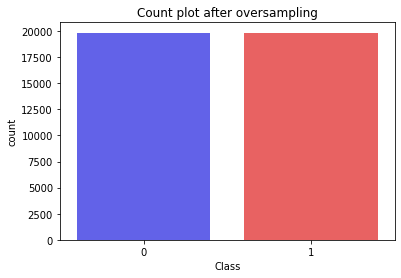

In [ ]:
sns.countplot(y_train_smote,palette= ["#0000FF","#FF0000"],alpha=0.7)
plt.title('Count plot after oversampling')
plt.show()

- [Back to the Top](#Introduction)
- [Go to the Bottom](#Conclusion)

# **Building of Model**
 **Predictive Models**
1. Random forest (**Base Model**)
2. Logistic regression
3. AdaBoost
4. Gradient Boost
5. Voting Classifier
6. XGBoost
7. Cat Boost

**In order to optimize the models, gridsearch with cross validation is applied to tune the hyperparameters of the different algorithms. Then, we test the balanced dataset's performance once more with the best parameters.**

## **Base Model - Random Forest Classifier**

**Hyperparameter tuning for Random Forest**

In [ ]:
#Instantiating the model and setting up grid search
rf = RandomForestClassifier(random_state = 42)
param_grid = {'max_features': [1,2,3,4,5,6,7,8,9,10],
              'max_leaf_nodes':[1,2, 3,4,5,6,7,8,9,10]}
grid_rfc = GridSearchCV(rf, param_grid = param_grid,cv =5,scoring = 'f1', n_jobs=-1)

#Fitting the model with X_train, y_train
grid_rfc.fit(X_train_smote,y_train_smote)

#checking for the test score, best parameters and cross-validation accuracies
print('Best cross-validation acuracy: {:.2f}'.format(grid_rfc.best_score_))
print('Best test score: {:.2f}'.format(grid_rfc.score(X_test,y_test)))
print('Best parameters:',grid_rfc.best_params_)

Best cross-validation acuracy: 1.00
Best test score: 0.59
Best parameters: {'max_features': 9, 'max_leaf_nodes': 10}


**Random Forest Model**

In [14]:
#Instantiating the model with best parameters
rfc = RandomForestClassifier(max_features = 3, max_leaf_nodes =10, random_state = 1415)

#Fitting the model with X_train, y_train
rfc.fit(X_train_smote, y_train_smote)
rfc_y_pred_smote = rfc.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(rfc.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(rfc.score(X_train_smote,y_train_smote)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, rfc_y_pred_smote))
rf_matrix = confusion_matrix(y_true=y_test, y_pred=rfc_y_pred_smote)
#print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=rfc_y_pred_smote))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(rfc_y_pred_smote , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test ,rfc_y_pred_smote)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , rfc_y_pred_smote)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , rfc_y_pred_smote)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , rfc_y_pred_smote)))
print("\n")

Test score:1.00
Train score:0.99

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8494
           1       0.79      0.83      0.81        18

    accuracy                           1.00      8512
   macro avg       0.89      0.92      0.91      8512
weighted avg       1.00      1.00      1.00      8512



Accuracy :1.00
AUC : 0.92
Precision : 0.79
Recall : 0.83
F1 : 0.81




**Creating a function to plot confusion matrix**

In [15]:
def plot_matrix(confusion, name,color_map):
    plt.figure(figsize = (8,7))
    group_names = ['True Negative','False Positive','False Negative','True Positive']
    group_counts = ["{0:0.0f}".format(value) for value in
    confusion.flatten()]
    
    group_percentages = ["{0:.1%}".format(value) for value in
    confusion.flatten()/np.sum(confusion)]
    
    #Getting the labels
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
    zip(group_names,group_counts,group_percentages)]
    
    #Setting the labels
    labels = np.asarray(labels).reshape(2,2)
    ax = sns.heatmap(confusion, annot=labels,vmax=20,annot_kws={"size": 15}, fmt='', cmap=color_map)
    ax.set_title(f'{name}\n',fontdict={'fontsize':25});
    ax.set_xlabel('\nPredicted Values',fontsize=16)
    ax.set_ylabel('Actual Values ',fontsize=16);
    
    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Legitimate','Fraudulent'],fontsize=15)
    ax.yaxis.set_ticklabels(['Legitimate','Fraudulent'],fontsize=15)
    
    ## Display the visualization of the Confusion Matrix.
    plt.show()

**Confusion Matrix**

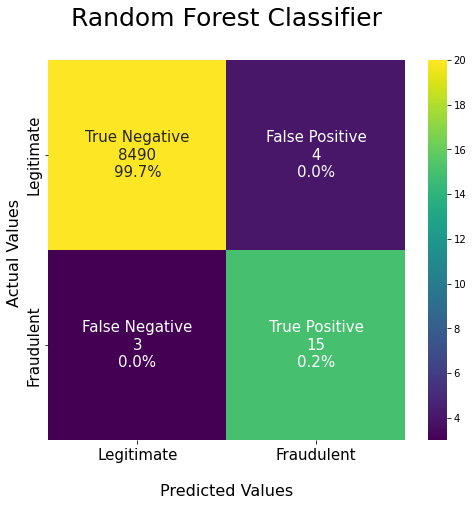

In [16]:
plot_matrix(rf_matrix,'Random Forest Classifier','viridis')

**ROC Curve**

AUC : 0.92 



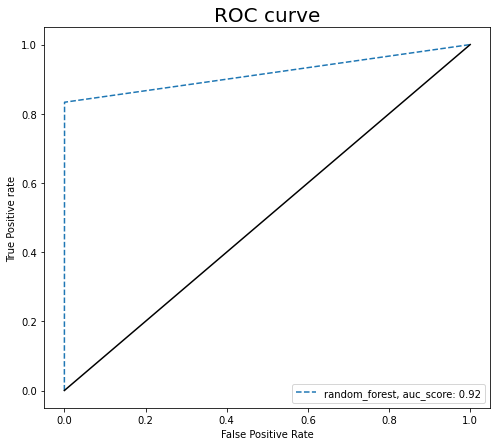

In [17]:
plt.figure(figsize = (8,7))
fpr, tpr, thresholds = roc_curve(y_test,rfc_y_pred_smote)

auc_score = roc_auc_score(y_test,rfc_y_pred_smote)
print('AUC : {0:0.2f}'.format(auc_score),'\n')

plt.plot(fpr,tpr,linestyle='--',label='random_forest, auc_score: {0:0.2f}'.format(auc_score))

plt.plot([0,1], [0,1], 'k-' )

# title
plt.title('ROC curve',fontdict={'fontsize':20})
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc=4)
plt.savefig('ROC',dpi=300)
plt.show();

## **Logistic Regression**

**Hyperparameter tuning for Logistic Regression**

In [ ]:
#Instantiating the model and setting up grid
steps = [('scaler', StandardScaler()),('lr',LogisticRegression())]
pipeline =Pipeline(steps)

param_grid = {'lr__C': [100, 10, 1.0, 0.1, 0.01], 'lr__class_weight': [None,'balanced']}
grid_logit = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring = 'f1', n_jobs=-1)

#Fitting the model with X_train, y_train
grid_logit.fit(X_train_smote,y_train_smote)

#checking for the test score, best parameters and cross-validation accuracies
print('Best cross-validation acuracy: {:.2f}'.format(grid_logit.best_score_))
print('Best test score: {:.2f}'.format(grid_logit.score(X_test,y_test)))
print('Best parameters:',grid_logit.best_params_)

Best cross-validation acuracy: 1.00
Best test score: 0.29
Best parameters: {'lr__C': 100, 'lr__class_weight': 'balanced'}


**Logistic Model**

In [18]:
#Instantiating the model with best parameters
steps = [('scaler', StandardScaler()),('logit',LogisticRegression(C=100, class_weight='balanced'))]
pipeline_lr =Pipeline(steps)

#Fitting the model with X_train_ros, y_train_ros
pipeline_lr.fit(X_train_smote, y_train_smote)
logit_y_pred_smote = pipeline_lr.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(pipeline_lr.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(pipeline_lr.score(X_train_smote,y_train_smote)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, logit_y_pred_smote))
logit_matrix = confusion_matrix(y_true=y_test, y_pred=logit_y_pred_smote)

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(logit_y_pred_smote , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test ,logit_y_pred_smote)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , logit_y_pred_smote)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , logit_y_pred_smote)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , logit_y_pred_smote)))
print("\n")

Test score:0.99
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      8494
           1       0.18      0.83      0.29        18

    accuracy                           0.99      8512
   macro avg       0.59      0.91      0.64      8512
weighted avg       1.00      0.99      0.99      8512



Accuracy :0.99
AUC : 0.91
Precision : 0.18
Recall : 0.83
F1 : 0.29




**Confusion Matrix**

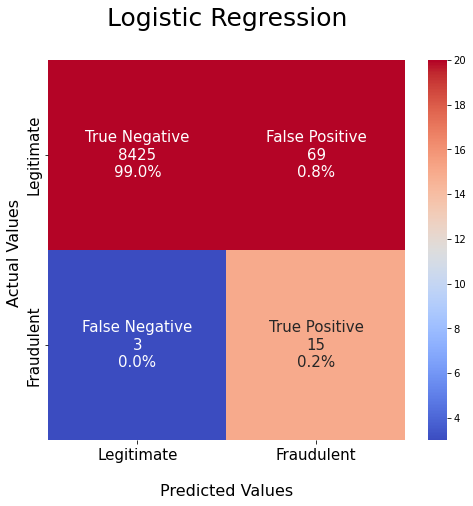

In [ ]:
plot_matrix(logit_matrix,'Logistic Regression','coolwarm')

**ROC Curve**

AUC : 0.91 



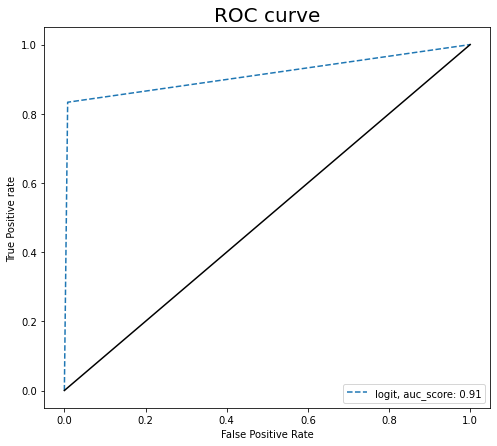

In [ ]:
plt.figure(figsize = (8,7))
fpr, tpr, thresholds = roc_curve(y_test,logit_y_pred_smote)

auc_score = roc_auc_score(y_test,logit_y_pred_smote)
print('AUC : {0:0.2f}'.format(auc_score),'\n')

plt.plot(fpr,tpr,linestyle='--',label='logit, auc_score: {0:0.2f}'.format(auc_score))

plt.plot([0,1], [0,1], 'k-' )

# title
plt.title('ROC curve',fontdict={'fontsize':20})
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc=4)
plt.savefig('ROC',dpi=300)
plt.show();

## **AdaBoost Classifier**

In [19]:
# Instantiate a decition tree classifier as the weaker model
rfc = RandomForestClassifier(max_features = 3, max_leaf_nodes =10, random_state = 1415)

#Instantiating and fitting the model
adb = AdaBoostClassifier(base_estimator = rfc,n_estimators=100, random_state=1415)
adb.fit(X_train_smote,y_train_smote)
adb_y_pred_smote = adb.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(adb.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(adb.score(X_train_smote,y_train_smote)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, adb_y_pred_smote))
adb_matrix = confusion_matrix(y_true=y_test, y_pred=adb_y_pred_smote)

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(adb_y_pred_smote , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test , adb_y_pred_smote)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , adb_y_pred_smote)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , adb_y_pred_smote)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , adb_y_pred_smote)))
print("\n")

Test score:1.00
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8494
           1       0.88      0.83      0.86        18

    accuracy                           1.00      8512
   macro avg       0.94      0.92      0.93      8512
weighted avg       1.00      1.00      1.00      8512



Accuracy :1.00
AUC : 0.92
Precision : 0.88
Recall : 0.83
F1 : 0.86




**Confusion Matrix**

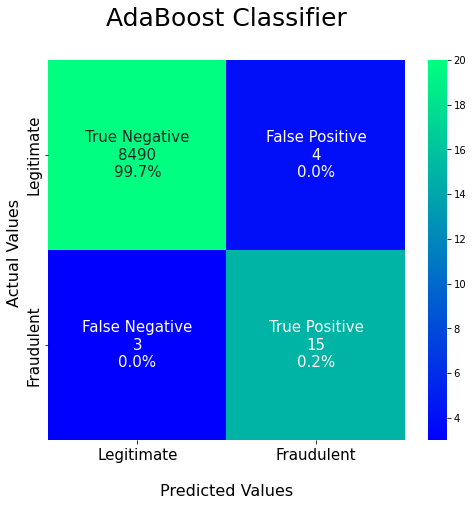

In [ ]:
plot_matrix(adb_matrix,'AdaBoost Classifier','winter')

**ROC Curve**

AUC : 0.92 



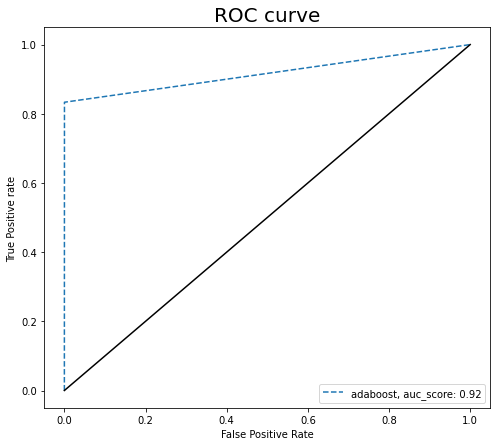

In [20]:
plt.figure(figsize = (8,7))
fpr, tpr, thresholds = roc_curve(y_test,adb_y_pred_smote)

auc_score = roc_auc_score(y_test,adb_y_pred_smote)
print('AUC : {0:0.2f}'.format(auc_score),'\n')

plt.plot(fpr,tpr,linestyle='--',label='adaboost, auc_score: {0:0.2f}'.format(auc_score))

plt.plot([0,1], [0,1], 'k-' )

# title
plt.title('ROC curve',fontdict={'fontsize':20})
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc=4)
plt.savefig('ROC',dpi=300)
plt.show();

## **Gradient Boost Classifier**

**Hyperparameter tuning for Gradient Boost**

In [ ]:
#Instantiating the model and setting up grid search
graboost = GradientBoostingClassifier(n_estimators=300, max_depth=1, random_state=42)
param_grid = {'n_estimators':[100,300,500],'max_features': [1,2,3,4,5,6,7,8,9,10],'max_leaf_nodes':[1,2, 3,4,5,6,7,8,9,10]}
grid_gbc = GridSearchCV(graboost, param_grid = param_grid,cv =5,scoring="f1",n_jobs=-1)

#Fitting the model with X_train, y_train
grid_gbc.fit(X_train_smote,y_train_smote)

#checking for the test score, best parameters and cross-validation accuracies
print('Best cross-validation acuracy: {:.2f}'.format(grid_gbc.best_score_))
print('Best test score: {:.2f}'.format(grid_gbc.score(X_test,y_test)))
print('Best parameters:',grid_gbc.best_params_)

Best cross-validation acuracy: 1.00
Best test score: 0.68
Best parameters: {'max_features': 4, 'max_leaf_nodes': 2, 'n_estimators': 500}


**Gradient Boost Model**

In [21]:
#Instantiating the model with best parameters
gbc = GradientBoostingClassifier(n_estimators=500,max_features=3, max_leaf_nodes= 2, random_state=1415)

#Fitting the model with X_train_ros, y_train_ros
gbc.fit(X_train_smote, y_train_smote)
gbc_y_pred_smote = gbc.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(gbc.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(gbc.score(X_train_smote,y_train_smote)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, gbc_y_pred_smote))
gbc_matrix = confusion_matrix(y_true=y_test, y_pred=gbc_y_pred_smote)

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(gbc_y_pred_smote , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test , gbc_y_pred_smote)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , gbc_y_pred_smote)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , gbc_y_pred_smote)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , gbc_y_pred_smote)))
print("\n")

Test score:1.00
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8494
           1       0.62      0.83      0.71        18

    accuracy                           1.00      8512
   macro avg       0.81      0.92      0.86      8512
weighted avg       1.00      1.00      1.00      8512



Accuracy :1.00
AUC : 0.92
Precision : 0.62
Recall : 0.83
F1 : 0.71




**Confusion Matrix**

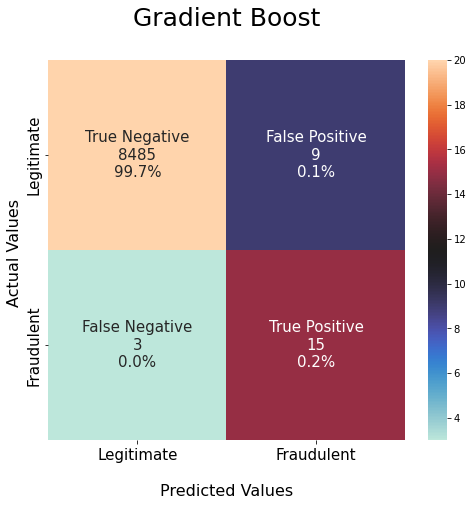

In [ ]:
plot_matrix(gbc_matrix,'Gradient Boost','icefire')

**ROC Curve**

AUC : 0.92 



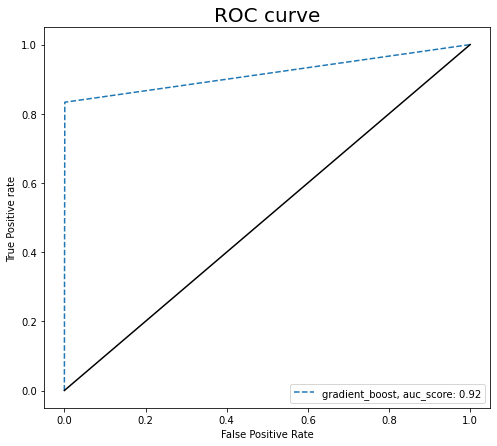

In [ ]:
plt.figure(figsize = (8,7))
fpr, tpr, thresholds = roc_curve(y_test,gbc_y_pred_smote)

auc_score = roc_auc_score(y_test,gbc_y_pred_smote)
print('AUC : {0:0.2f}'.format(auc_score),'\n')

plt.plot(fpr,tpr,linestyle='--',label='gradient_boost, auc_score: {0:0.2f}'.format(auc_score))

plt.plot([0,1], [0,1], 'k-' )

# title
plt.title('ROC curve',fontdict={'fontsize':20})
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc=4)
plt.savefig('ROC',dpi=300)
plt.show();

## **Voting Classifier**

In [22]:
# Instantiate individual classifiers
lr = LogisticRegression(C=0.1, class_weight=None, random_state=42)
rfc = RandomForestClassifier(max_features = 9, max_leaf_nodes =7, random_state = 42)
dtr = DecisionTreeClassifier(max_depth=6, min_samples_leaf=0.04, max_features=0.2, random_state=42)
# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),
('Random Forest', rfc),
('Decision Tree', dtr)]


**Checking the accuracies**

In [23]:
# Iterate over the defined list of tuples containing the classifiers
for model_name, model in classifiers:
        #fit model to the training set (ROS)
        model.fit(X_train_smote,y_train_smote)
        # Predict the labels of the test set
        model_y_pred_smote = model.predict(X_test)
        # Evaluate the accuracy of model on the test set
        print('{:s} : {:.2f}'.format(model_name, accuracy_score(y_test, model_y_pred_smote)))

Logistic Regression : 0.98
Random Forest : 1.00
Decision Tree : 0.94


**Building Voting Classifier Model**

In [24]:
#Instantiating  votting classifier model 
vc = VotingClassifier(estimators=classifiers,voting = 'hard')

# Fit 'vc' to the traing set and predict test set labels (ROS)
vc.fit(X_train_smote, y_train_smote)
vc_y_pred_smote = vc.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(vc.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(vc.score(X_train_smote,y_train_smote)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, vc_y_pred_smote))
vc_matrix = confusion_matrix(y_true=y_test, y_pred=vc_y_pred_smote)

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(vc_y_pred_smote , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test , vc_y_pred_smote)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , vc_y_pred_smote)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , vc_y_pred_smote)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , vc_y_pred_smote)))
print("\n")

Test score:1.00
Train score:0.99

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8494
           1       0.52      0.83      0.64        18

    accuracy                           1.00      8512
   macro avg       0.76      0.92      0.82      8512
weighted avg       1.00      1.00      1.00      8512



Accuracy :1.00
AUC : 0.92
Precision : 0.52
Recall : 0.83
F1 : 0.64




**Confusion Matrix**

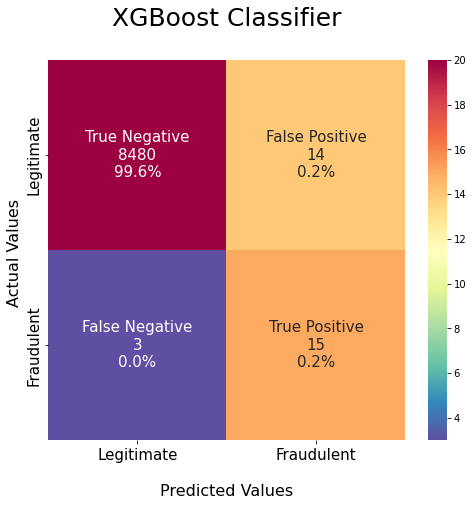

In [25]:
plot_matrix(vc_matrix,'XGBoost Classifier','Spectral_r')

**ROC Curve**

AUC : 0.92 



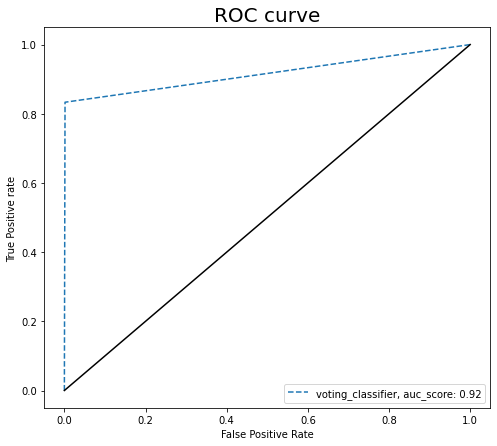

In [26]:
plt.figure(figsize = (8,7))
fpr, tpr, thresholds = roc_curve(y_test,vc_y_pred_smote)

auc_score = roc_auc_score(y_test,vc_y_pred_smote)
print('AUC : {0:0.2f}'.format(auc_score),'\n')

plt.plot(fpr,tpr,linestyle='--',label='voting_classifier, auc_score: {0:0.2f}'.format(auc_score))

plt.plot([0,1], [0,1], 'k-' )

# title
plt.title('ROC curve',fontdict={'fontsize':20})
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc=4)
plt.savefig('ROC',dpi=300)
plt.show();

## **XGBoost Classifier**

In [27]:
#instantiating and fitting the model
xgboost = XGBClassifier()
xgboost.fit(X_train_smote, y_train_smote)
xgb_pred_smote = xgboost.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(xgboost.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(xgboost.score(X_train_smote,y_train_smote)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, xgb_pred_smote))
xgb_matrix = confusion_matrix(y_true=y_test, y_pred=xgb_pred_smote)

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(xgb_pred_smote , y_test)))
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test , xgb_pred_smote)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , xgb_pred_smote)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , xgb_pred_smote)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , xgb_pred_smote)))
print("\n")

Test score:1.00
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8494
           1       0.83      0.83      0.83        18

    accuracy                           1.00      8512
   macro avg       0.92      0.92      0.92      8512
weighted avg       1.00      1.00      1.00      8512



Accuracy :1.00
AUC : 0.92
Precision : 0.83
Recall : 0.83
F1 : 0.83




**Confusion Matrix**

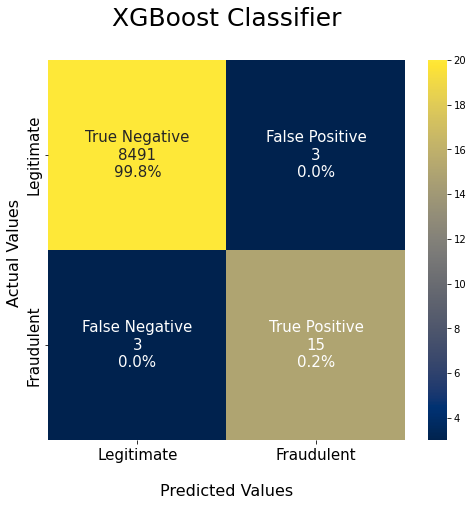

In [ ]:
plot_matrix(xgb_matrix,'XGBoost Classifier','cividis')

**ROC Curve**

AUC : 0.92 



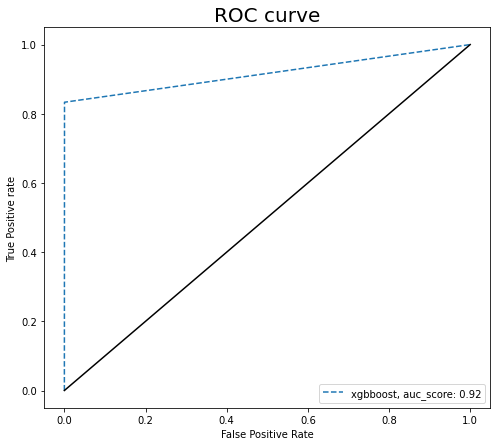

In [ ]:
plt.figure(figsize = (8,7))
fpr, tpr, thresholds = roc_curve(y_test,xgb_pred_smote)

auc_score = roc_auc_score(y_test,xgb_pred_smote)
print('AUC : {0:0.2f}'.format(auc_score),'\n')

plt.plot(fpr,tpr,linestyle='--',label='xgbboost, auc_score: {0:0.2f}'.format(auc_score))

plt.plot([0,1], [0,1], 'k-' )

# title
plt.title('ROC curve',fontdict={'fontsize':20})
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc=4)
plt.savefig('ROC',dpi=300)
plt.show();

## **Cat Boost Classifier**

In [28]:
#instantiating  and fitting CatBoost Model
ctb= CatBoostClassifier()
ctb.fit(X_train_smote,y_train_smote)
ctb_pred_smote =ctb.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(ctb.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(ctb.score(X_train_smote,y_train_smote)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, ctb_pred_smote))
ctb_matrix = confusion_matrix(y_true=y_test, y_pred=ctb_pred_smote)

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(ctb_pred_smote , y_test)))
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test , ctb_pred_smote)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , ctb_pred_smote)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , ctb_pred_smote)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , ctb_pred_smote)))
print("\n")

Learning rate set to 0.049602
0:	learn: 0.5262452	total: 77.3ms	remaining: 1m 17s
1:	learn: 0.4139681	total: 99.1ms	remaining: 49.5s
2:	learn: 0.3224333	total: 121ms	remaining: 40.4s
3:	learn: 0.2539484	total: 143ms	remaining: 35.5s
4:	learn: 0.2090745	total: 163ms	remaining: 32.4s
5:	learn: 0.1701195	total: 184ms	remaining: 30.4s
6:	learn: 0.1360090	total: 214ms	remaining: 30.3s
7:	learn: 0.1100133	total: 236ms	remaining: 29.3s
8:	learn: 0.0922759	total: 257ms	remaining: 28.3s
9:	learn: 0.0795448	total: 277ms	remaining: 27.5s
10:	learn: 0.0699674	total: 298ms	remaining: 26.8s
11:	learn: 0.0627935	total: 317ms	remaining: 26.1s
12:	learn: 0.0547010	total: 337ms	remaining: 25.6s
13:	learn: 0.0480052	total: 357ms	remaining: 25.2s
14:	learn: 0.0432189	total: 378ms	remaining: 24.8s
15:	learn: 0.0377448	total: 414ms	remaining: 25.5s
16:	learn: 0.0334750	total: 462ms	remaining: 26.7s
17:	learn: 0.0305141	total: 483ms	remaining: 26.3s
18:	learn: 0.0277838	total: 504ms	remaining: 26s
19:	learn:

**Confusion Matrix**

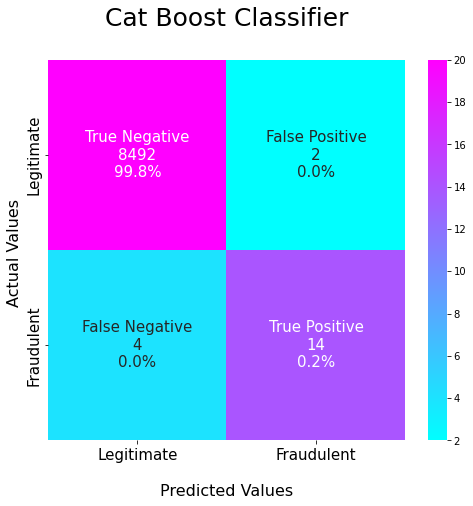

In [ ]:
plot_matrix(ctb_matrix,'Cat Boost Classifier','cool')

**ROC Curve**

AUC : 0.89 



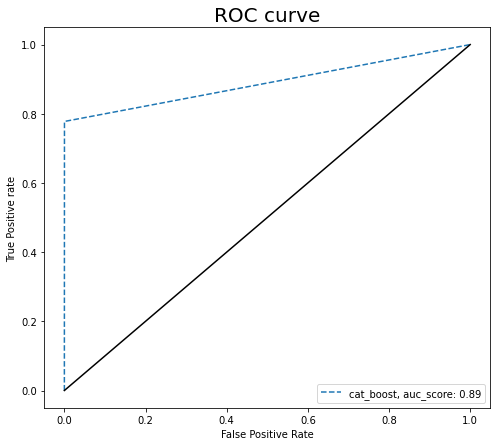

In [ ]:
plt.figure(figsize = (8,7))
fpr, tpr, thresholds = roc_curve(y_test,ctb_pred_smote)

auc_score = roc_auc_score(y_test,ctb_pred_smote)
print('AUC : {0:0.2f}'.format(auc_score),'\n')

plt.plot(fpr,tpr,linestyle='--',label='cat_boost, auc_score: {0:0.2f}'.format(auc_score))

plt.plot([0,1], [0,1], 'k-' )

# title
plt.title('ROC curve',fontdict={'fontsize':20})
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc=4)
plt.savefig('ROC',dpi=300)
plt.show();

- [Back to the Top](#Introduction)
- [Go to the Bottom](#Conclusion)

# **Model Selection**

## **Creating a DataFrame with Performance measures**

**Accuracy Scores**

In [29]:
#Accuracy Scores
logit_ros_acc = accuracy_score(logit_y_pred_smote , y_test)
rfc_ros_acc = accuracy_score(rfc_y_pred_smote , y_test)
adb_ros_acc = accuracy_score(adb_y_pred_smote , y_test)
gbc_ros_acc = accuracy_score(gbc_y_pred_smote , y_test)
vc_ros_acc = accuracy_score(vc_y_pred_smote , y_test)
xgb_ros_acc = accuracy_score(xgb_pred_smote , y_test)
ctb_ros_acc = accuracy_score(ctb_pred_smote,y_test)

**Precision Scores**

In [30]:
# Precision Scores
logit_ros_pre = precision_score(y_test, logit_y_pred_smote)
rfc_ros_pre = precision_score(y_test, rfc_y_pred_smote)
adb_ros_pre = precision_score(y_test, adb_y_pred_smote)
gbc_ros_pre = precision_score(y_test, gbc_y_pred_smote)
vc_ros_pre = precision_score(y_test, vc_y_pred_smote)
xgb_ros_pre = precision_score(y_test, xgb_pred_smote)
ctb_ros_pre =precision_score(y_test, ctb_pred_smote)

**Recall Scores**

In [31]:
 # Recall Scores
logit_ros_rcc = recall_score(y_test, logit_y_pred_smote)
rfc_ros_rcc = recall_score(y_test, rfc_y_pred_smote)
adb_ros_rcc = recall_score(y_test, adb_y_pred_smote)
gbc_ros_rcc = recall_score(y_test, gbc_y_pred_smote)
vc_ros_rcc = recall_score(y_test, vc_y_pred_smote)
xgb_ros_rcc = recall_score(y_test, xgb_pred_smote)
ctb_ros_rcc = recall_score(y_test, ctb_pred_smote)


**F1 Scores**

In [32]:
#Recall Scores
logit_ros_f1 = f1_score(y_test, logit_y_pred_smote)
rfc_ros_f1 = f1_score(y_test, rfc_y_pred_smote)
adb_ros_f1 = f1_score(y_test, adb_y_pred_smote)
gbc_ros_f1 = f1_score(y_test, gbc_y_pred_smote)
vc_ros_f1 = f1_score(y_test, vc_y_pred_smote)
xgb_ros_f1 = f1_score(y_test, xgb_pred_smote)
ctb_ros_f1 = f1_score(y_test, ctb_pred_smote)

In [33]:
# AUC Scores
logit_ros_auc = roc_auc_score(y_test, logit_y_pred_smote)
rfc_ros_auc = roc_auc_score(y_test, rfc_y_pred_smote)
adb_ros_auc = roc_auc_score(y_test, adb_y_pred_smote)
gbc_ros_auc = roc_auc_score(y_test, gbc_y_pred_smote)
vc_ros_auc = roc_auc_score(y_test, vc_y_pred_smote)
xgb_ros_auc = roc_auc_score(y_test, xgb_pred_smote)
ctb_ros_auc = roc_auc_score(y_test, ctb_pred_smote)

In [34]:
#creating the list for models
Model = ['Logit', 'Random Forest', 'AdaBoost','Gradient Boost','Voting', 'XGBOOST','CATBOOST']

Accuracy_Score = [logit_ros_acc, rfc_ros_acc, adb_ros_acc, gbc_ros_acc, vc_ros_acc, xgb_ros_acc, ctb_ros_acc]

Precision_Score = [logit_ros_pre, rfc_ros_pre, adb_ros_pre, gbc_ros_pre, vc_ros_pre, xgb_ros_pre, ctb_ros_pre]

AUC_Score = [logit_ros_auc, rfc_ros_auc, adb_ros_auc, gbc_ros_auc, vc_ros_auc, xgb_ros_auc, ctb_ros_auc] 

Recall_Score = [logit_ros_rcc, rfc_ros_rcc, adb_ros_rcc, gbc_ros_rcc, vc_ros_rcc, xgb_ros_rcc, ctb_ros_rcc] 

F1_Score = [logit_ros_f1, rfc_ros_f1, adb_ros_f1, gbc_ros_f1,vc_ros_f1, xgb_ros_f1, ctb_ros_f1] 

In [35]:
#Creating the DataFrame

performance = pd.DataFrame({'Model':Model,
                                        'Accuracy_Score':Accuracy_Score,
                                        'Precision_Score':Precision_Score,
                                        'AUC_Score':AUC_Score,
                                        'Recall_Score':Recall_Score,
                                        'F1_Score':F1_Score})
performance.set_index('Model')

,Accuracy_Score,Precision_Score,AUC_Score,Recall_Score,F1_Score
Model,,,,,
Logit,0.991541,0.178571,0.912605,0.833333,0.294118
Random Forest,0.999178,0.789474,0.916431,0.833333,0.810811
AdaBoost,0.999413,0.882353,0.916549,0.833333,0.857143
Gradient Boost,0.998590,0.625000,0.916137,0.833333,0.714286
Voting,0.998003,0.517241,0.915843,0.833333,0.638298
XGBOOST,0.999295,0.833333,0.916490,0.833333,0.833333
CATBOOST,0.999295,0.875000,0.888771,0.777778,0.823529


In [36]:
#Sorting by f1_score
performance = performance.sort_values(['F1_Score','Recall_Score','AUC_Score'],ascending=[False,False,False])
performance = performance.reset_index(drop=True)

In [37]:
performance

,Model,Accuracy_Score,Precision_Score,AUC_Score,Recall_Score,F1_Score
0,AdaBoost,0.999413,0.882353,0.916549,0.833333,0.857143
1,XGBOOST,0.999295,0.833333,0.916490,0.833333,0.833333
2,CATBOOST,0.999295,0.875000,0.888771,0.777778,0.823529
3,Random Forest,0.999178,0.789474,0.916431,0.833333,0.810811
4,Gradient Boost,0.998590,0.625000,0.916137,0.833333,0.714286
5,Voting,0.998003,0.517241,0.915843,0.833333,0.638298
6,Logit,0.991541,0.178571,0.912605,0.833333,0.294118


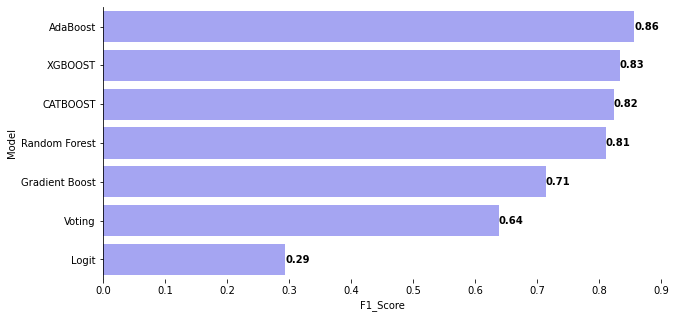

In [38]:
plt.figure(figsize=(10,5))
ax = sns.barplot(y="Model", x="F1_Score", data = performance, color = "b", alpha = 0.4)
sns.despine(top=True, right=True, left=False, bottom=True)
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.2f"% rect.get_width(), weight='bold',ha = 'left', va = 'center')
plt.show()

## **ROC Curve**

In [ ]:
# roc curve for models
fpr2, tpr2, thresh2 = roc_curve(y_test, logit_y_pred_smote)
fpr5, tpr5, thresh5 = roc_curve(y_test, rfc_y_pred_smote)
fpr6, tpr6, thresh6 = roc_curve(y_test, vc_y_pred_smote)
fpr7, tpr7, thresh7 = roc_curve(y_test, adb_y_pred_smote)
fpr8, tpr8, thresh8 = roc_curve(y_test, gbc_y_pred_smote)
fpr9, tpr9, thresh9 = roc_curve(y_test, xgb_pred_smote)
fpr10, tpr10, thresh10 = roc_curve(y_test, ctb_pred_smote)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

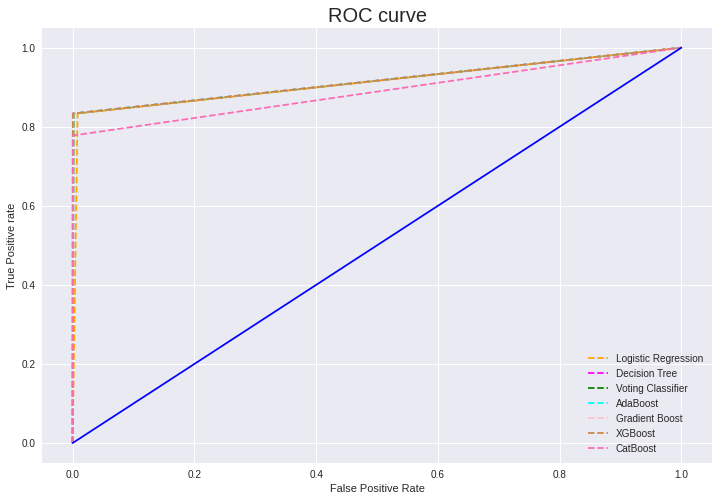

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(12, 8))
# plot roc curves
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr5, tpr5, linestyle='--',color='magenta', label='Decision Tree')
plt.plot(fpr6, tpr6, linestyle='--',color='green', label='Voting Classifier')
plt.plot(fpr7, tpr7, linestyle='--',color='cyan', label='AdaBoost')
plt.plot(fpr8, tpr8, linestyle='--',color='pink', label='Gradient Boost')
plt.plot(fpr9, tpr9, linestyle='--',color='peru', label='XGBoost')
plt.plot(fpr10, tpr10, linestyle='--',color='hotpink', label='CatBoost')
plt.plot(p_fpr, p_tpr, color='blue')




# title
plt.title('ROC curve',fontdict={'fontsize':20})
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## **Best Model**
Considering the F1 scores of the different models, the Adaboost model emerges as the best performing model followed by the XGBoost. Hence, the **Adaboost model** is chosen as the **best model**.  

## **Feature Importance**

In [ ]:
adb.feature_importances_

array([0.0234072 , 0.02717971, 0.01606504, 0.06679226, 0.10426243,
       0.02173236, 0.01835383, 0.01863705, 0.03041223, 0.04274622,
       0.03104743, 0.04486337, 0.09391578, 0.01559051, 0.06211242,
       0.01035161, 0.03474595, 0.09935996, 0.02169585, 0.02245176,
       0.01248711, 0.02677113, 0.01662098, 0.00669122, 0.01315242,
       0.02026243, 0.01748976, 0.03020774, 0.03487801, 0.01571622])

In [ ]:
feature_importances = pd.DataFrame({"Features":X_train_smote.columns,"Importance":adb.feature_importances_})

In [ ]:
feature_importances = feature_importances.sort_values(by = 'Importance',ascending = False)

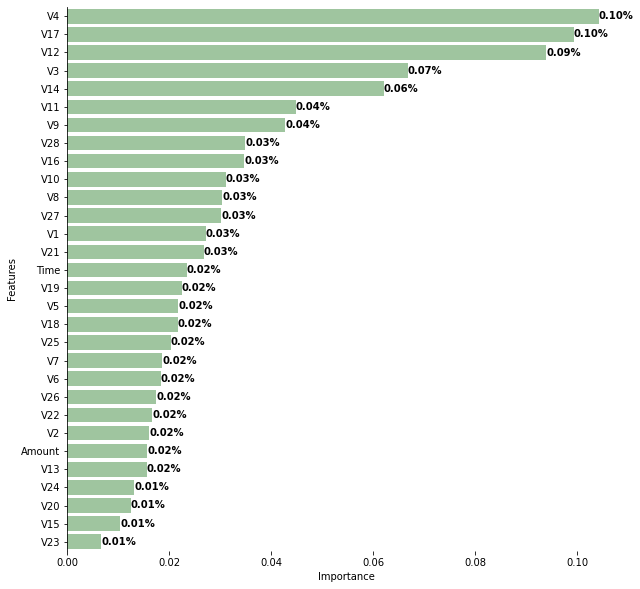

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x='Importance',y='Features',data = feature_importances, color = 'g',alpha = 0.4)
sns.despine(top=True, right=True, left=False, bottom=True)

for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.2f%%"% rect.get_width(), weight='bold',ha = 'left', va = 'center')


plt.show()

From the plot above, the first 3 importance features include:

1. V4
2. V17
3. V12
4. V3
5. V14


- [Back to the Top](#Introduction)

# **Implementing the Best Model with test data**

**Preprocessing the data**

In [101]:
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fraud detection/CreditCardTest.csv')
test_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,34639,1.131626,-0.088298,1.172179,1.152068,-0.764832,0.305715,-0.664862,0.254449,0.646994,-0.034043,0.624888,1.089994,0.055161,-0.192111,-0.504353,0.366973,-0.620045,0.532927,0.200596,-0.108459,-0.031167,0.083674,-0.058880,0.002381,0.429609,-0.406019,0.068524,0.024929,9.99
1,30839,-2.147944,-1.798104,3.024565,0.015564,0.471204,2.623902,-1.196341,1.310788,1.197515,-1.326756,0.574022,1.007117,-1.048318,-0.912135,-1.406055,-1.134138,1.021535,-1.194684,-1.332039,0.394724,0.433734,1.125734,0.267676,-1.298110,0.205566,0.766895,0.041025,0.075159,172.50
2,35896,-1.065362,1.889449,0.081167,0.283334,-0.704927,0.730100,-3.091456,-7.932559,-1.498847,-1.663888,1.389674,2.096157,0.221723,1.606099,-0.266467,0.707783,-0.209453,0.125191,-0.567049,1.899159,-3.662491,1.501483,0.365308,0.551693,0.459161,0.318559,-0.012604,0.319118,4.49
3,26470,-1.525834,-0.066186,2.266000,1.300142,-0.275625,0.478665,0.080960,0.261369,-0.219635,0.057172,0.759979,0.730751,0.532179,-0.262949,0.348290,0.097718,-0.423806,1.066736,1.089845,0.394221,0.202497,0.712782,-0.187735,0.055857,0.433339,-0.052267,0.244470,0.250621,160.00
4,70264,1.194461,0.677449,-0.373076,1.301509,0.271780,-0.773935,0.234609,-0.107133,-0.095331,-0.725823,0.346454,-0.028083,-0.074925,-1.308765,1.340851,0.303674,1.172546,0.143040,-0.983882,-0.129495,-0.040055,-0.007258,-0.094118,-0.059187,0.618449,-0.297706,0.051760,0.054099,1.00


In [58]:
# Checking for missing values
test_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [64]:
# Checking for duplicates
test_df.duplicated().sum()
print("The dataset contains {} duplicates".format(test_df.duplicated().sum()))

The dataset contains 0 duplicates


In [93]:
# Check whether the train and test dat have the same number of columns
assert (X_train_smote.columns == test_df.columns).all()

In [102]:
# testing our model
test_pred = adb.predict(test_df)

In [95]:
test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [107]:
test_df['Predicted_class'] = test_pred

In [111]:
test_df['Predicted_class'].replace({0:'No Fraud',1:'Fraudulent'},inplace =True)

In [112]:
test_df['Predicted_class'].value_counts()

No Fraud      1994
Fraudulent       6
Name: Predicted_class, dtype: int64

# **Conclusion**

In order to get the best classification model, Exploratory Data Analysis (EDA) was carried out. The data was investigated, were it was dicovered that the data cotained few duplicates which were dropped. The original train dataset was split into train and test for building and validating models respectively.

Random Forrest Classifier was used as the base model for which it obtained an AUC scode of 0.92 and F1 score of 0.81 when predicting the target for the test set.

The second model was  Logistic Regression model, with lowest F1 score (0.83) for prediction of the test set target values.

It was then followed with an Adaboost, Gradient Boost, Voting Classifier, XGBoost and CatBoostClassifier, with the F1 scores of 0.86, 0.71, 0.63, 0.83 and 0.82 respectively. 

After comparing the different classification models using F1score, AUC score and confusion matrix, the **Adaboost Classifier model emerged as the top performing models.**

Yet to be done

To predict transactions and determine if they are legitimate or fraudulent, the Adaboost model was utilized. The model predicted that 6 transactions out of the total 2000 transactions were fraudulent.

**THANK YOU**


**ALL COMMENTS AND SUGGESTIONS ARE WELCOME**

- [Back to the Top](#Introduction)
- [Go to Models](#Building-of-Model)